# Recommander System (Programming Collective Intelligence)

## By 김성동 

## - User-Based Filtering 

## - Item-Based Filtering 

## - 무비렌즈 예제

# Collecting Preferences

맨 처음해야 하는 건 각기 다른 사람들의 선호를 나타내는 것이다. 아주 간단한 방법으로 이 nested dictionary를 사용할 수 있다. 이 딕셔너리는 사람들이 각 영화에 1~5점으로 평점 매긴 정보를 나타낸다. 

In [2]:
# A dictionary of movie critics and their ratings of a small
# set of movies
critics={'Lisa Rose': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.5,
 'Just My Luck': 3.0, 'Superman Returns': 3.5, 'You, Me and Dupree': 2.5, 
 'The Night Listener': 3.0},
'Gene Seymour': {'Lady in the Water': 3.0, 'Snakes on a Plane': 3.5, 
 'Just My Luck': 1.5, 'Superman Returns': 5.0, 'The Night Listener': 3.0, 
 'You, Me and Dupree': 3.5}, 
'Michael Phillips': {'Lady in the Water': 2.5, 'Snakes on a Plane': 3.0,
 'Superman Returns': 3.5, 'The Night Listener': 4.0},
'Claudia Puig': {'Snakes on a Plane': 3.5, 'Just My Luck': 3.0,
 'The Night Listener': 4.5, 'Superman Returns': 4.0, 
 'You, Me and Dupree': 2.5},
'Mick LaSalle': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0, 
 'Just My Luck': 2.0, 'Superman Returns': 3.0, 'The Night Listener': 3.0,
 'You, Me and Dupree': 2.0}, 
'Jack Matthews': {'Lady in the Water': 3.0, 'Snakes on a Plane': 4.0,
 'The Night Listener': 3.0, 'Superman Returns': 5.0, 'You, Me and Dupree': 3.5},
'Toby': {'Snakes on a Plane':4.5,'You, Me and Dupree':1.0,'Superman Returns':4.0}}



critics['유저 이름']['영화 이름']

In [3]:
critics['Lisa Rose']['Lady in the Water']

2.5

In [4]:
critics['Toby']['Snakes on a Plane']

4.5

In [5]:
critics['Toby']

{'Snakes on a Plane': 4.5, 'Superman Returns': 4.0, 'You, Me and Dupree': 1.0}

하지만 아주 큰 데이터셋은.. 아마 database에 저장하길 원할 것이다. 

# Finding Similar Users

데이터를 수집한 후에는 사람들의 taste(선호) 유사도를 계산하여 결정해야 한다. 당신은 모든 유저 간의 similarity score를 계산하여 비교할 수 있다. 이 similarity score를 계산하는 2가지 방법인 Euclidean distance와 Pearson correlation을 알아보자

### Euclidean Distance Score 

similarity score를 계산하는 가장 간단한 방법 중 하나는 바로 Euclidean distance score이다. 이 것을 계산하기 위해서는 제곱하기 위한 pow(n,2) 함수와 제곱근을 구하기 위한 sqrt(n) 함수를 사용할 수 있다.

In [3]:
from math import sqrt

In [4]:
sqrt(pow(5-4,2) + pow(4-1,2)) # (1,5)과 (2,4)

3.1622776601683795

이렇게 계산한 거리가 작을수록 두 유저는 유사하다고 할 수 있다. 하지만 거리 차이가 커질 경우를 위해 1을 더해주고 1에서 나눠주는 방식을 사용한다. 이 새로운 함수는 항상 0에서 1 사이의 값을 리턴한다. 1에 가까울수록 유사도가 높다고 말할 수 있다. 

In [8]:
1/(1+sqrt(pow(5-4,2)+pow(4-1,2)))

0.2402530733520421

In [5]:
# Returns a distance-based similarity score for person1 and person2
def sim_distance(prefs,person1,person2):
  # Get the list of shared_items
  si={}  # for문을 돌면서 person1과 person2가 공통적으로 rating한 영화가 있다면 1씩 카운트한다. 
  for item in prefs[person1]: 
    if item in prefs[person2]: si[item]=1

  # if they have no ratings in common, return 0 
  if len(si)==0: return 0 # 공통적으로 rating 매긴 영화가 없다면 0을 리턴

  # Add up the squares of all the differences
  sum_of_squares=sum([pow(prefs[person1][item]-prefs[person2][item],2) 
                      for item in prefs[person1] if item in prefs[person2]])
# 모든 rating 점수의 거리의 제곱을 다 더한다.
  return 1/(1+sum_of_squares)

In [5]:
sim_distance(critics,'Lisa Rose', 'Gene Seymour')

0.14814814814814814

### Pearson Correlation Score 

사람들 간의 유사도를 결정하는 좀 더 정교한 방법으로 Pearson Correlation coefficient를 사용한다. 데이터가 normalized 안되어 있을때 더 괜찮은 결과를 준다.(보통은 정규화된 레이팅에 vector similarity를 사용..)

In [6]:
# Returns the Pearson correlation coefficient for p1 and p2
def sim_pearson(prefs,p1,p2):
  # Get the list of mutually rated items
  si={}
  for item in prefs[p1]: 
    if item in prefs[p2]: si[item]=1

  # if they are no ratings in common, return 0Q
  if len(si)==0: return 0

  # Sum calculations
  n=len(si)
  
  # Sums of all the preferences
  sum1=sum([prefs[p1][it] for it in si])
  sum2=sum([prefs[p2][it] for it in si])
  
  # Sums of the squares
  sum1Sq=sum([pow(prefs[p1][it],2) for it in si])
  sum2Sq=sum([pow(prefs[p2][it],2) for it in si])
  
  # Sum of the products
  pSum=sum([prefs[p1][it]*prefs[p2][it] for it in si])
  
  # Calculate r (Pearson score)
  num=pSum-(sum1*sum2/n)
  den=sqrt((sum1Sq-pow(sum1,2)/n)*(sum2Sq-pow(sum2,2)/n))
  if den==0: return 0

  r=num/den

  return r

이 함수는 -1에서 1 사이의 값을 리턴한다. distance metric과는 달리 올바른 스케일값을 얻기 위해 값을 변경할 필요가 없다.

In [10]:
sim_pearson(critics,'Lisa Rose', 'Gene Seymour')

0.39605901719066977

### Which Similarity Metric should you use? 

여기서 2가지 방법만 소개했지만 실은 데이터 간의 similarity를 구하는 방법은 여러가지가 있다. 물론 너의 application에 달려있겠지만 최고의 결과를 만들기 위해 Pearson, Euclidean distance, or others를 사용해보라. (Jaccard coefficient, Manhattan distance)

### Ranking the Critics 

이제 두 사람을 비교하는 함수는 가지고 있으니까 나와 다른 사람들을 모두 비교해가며 가장 매치가 잘되는 사람들의 랭킹을 따지자! (이 사람의 선호가 나에게 잘 맞을거 같은 순으로) 

In [7]:
# Returns the best matches for person from the prefs dictionary. 
# Number of results and similarity function are optional params.
def topMatches(prefs,person,n=5,similarity=sim_pearson):
  scores=[(similarity(prefs,person,other),other) 
                  for other in prefs if other!=person]
  scores.sort()
  scores.reverse()
  return scores[0:n]

이 함수는 지정된 방식으로 다른 유저와의 유사도를 구한 후 지정된 Top-N명의 스코어를 리턴한다.

In [12]:
topMatches(critics, 'Toby',n=3)

[(0.9912407071619299, 'Lisa Rose'),
 (0.9244734516419049, 'Mick LaSalle'),
 (0.8934051474415647, 'Claudia Puig')]

# Recommending Items 

이제 추천을 함 해보자. 나랑 제일 비슷한 사람이 누구인지를 찾고 그 사람이 본 영화 중 내가 아직 안 본 영화를 찾기만 하면 된다. 하지만 이러한 방식은 너무나 관대하다? 리뷰어가 아주 이상하게 좋아하는 (특이 취향으로 인해..) 영화를 추천받을 수도 있다.


이 문제를 해결하기 위해, 평가를 랭킹 매기기 위해 각 아이템에 weighted core를 매긴다.

In [19]:
from IPython.display import Image

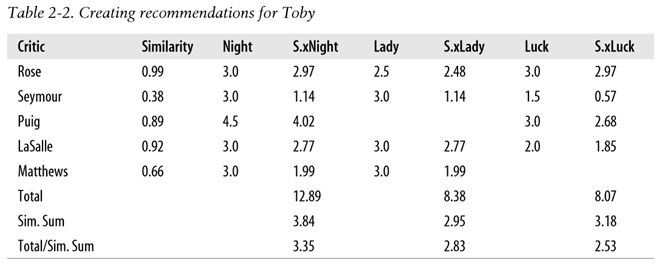

In [14]:
Image(filename='./images/Toby.png', width=500) 

S.x 는 각 영화 레이팅에 Similarity로 가중치를 매긴 점수이다. 이는 나와 유사한 사람의 영화일수록 더욱 점수가 높아진다는 뜻이다. 최종 토비의 각 영화에 대한 점수는 Total/Sim.Sum으로 나타난다.

In [9]:
# Gets recommendations for a person by using a weighted average
# of every other user's rankings
def getRecommendations(prefs,person,similarity=sim_pearson):
  totals={}
  simSums={}
  for other in prefs:
    # don't compare me to myself
    if other==person: continue
    sim=similarity(prefs,person,other)

    # ignore scores of zero or lower
    if sim<=0: continue
    for item in prefs[other]:
    
      # only score movies I haven't seen yet
      if item not in prefs[person] or prefs[person][item]==0:
        # Similarity * Score
        totals.setdefault(item,0) # 딕셔너리에 채우기 전에 조치??(공간 미리 만들기)
        totals[item]+=prefs[other][item]*sim
        # Sum of similarities
        simSums.setdefault(item,0)
        simSums[item]+=sim

  # Create the normalized list
  rankings=[(total/simSums[item],item) for item,total in totals.items()] # dic.items()은 key-value 쌍 얻는다.

  # Return the sorted list
  rankings.sort()
  rankings.reverse()
  return rankings

In [10]:
getRecommendations(critics,'Toby')

[(3.3477895267131013, 'The Night Listener'),
 (2.832549918264162, 'Lady in the Water'),
 (2.5309807037655645, 'Just My Luck')]

In [20]:
getRecommendations(critics,'Toby',similarity=sim_distance)

[(3.5002478401415877, 'The Night Listener'),
 (2.7561242939959363, 'Lady in the Water'),
 (2.461988486074373, 'Just My Luck')]

랭킹 매겨진 영화들을 얻을 수 있을 뿐만 아니라 그 영화에 대한 rating된 점수를 짐작할 수 있다(예측값). 이제 추천시스템 구축이 끝났고 당신이 할 일은 people, item, score dictionary를 set up하는 일만 남았다. 이후에 del.icio.us API를 사용하여 실제로 웹에서 people 데이터를 수집하는 것을 보게 될 것이다!

# Matching Products 

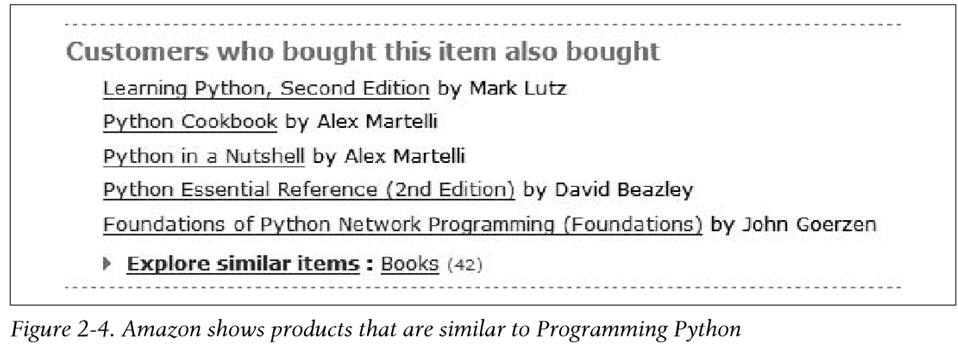

In [21]:
Image(filename='./images/matching.png', width=500) 

이 제품을 산 사람들이 산 다른 제품들! 
이 경우엔, 그 제품을 좋아한 다른 사람들과의 유사도를 결정하고 그들이 좋아한 제품을 찾아야 한다. 이는 우리가 앞서 한 방법이랑 같은 방법이고 단지 people과 item의 swap하면 된다~(dictionary의 nested를)

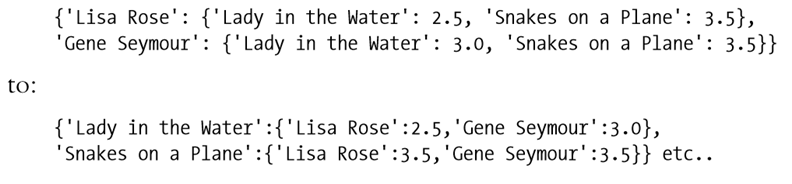

In [22]:
Image(filename='./images/03.png', width=500) 

In [11]:
def transformPrefs(prefs):
  result={}
  for person in prefs:
    for item in prefs[person]:
      result.setdefault(item,{})
      
      # Flip item and person
      result[item][person]=prefs[person][item]
  return result

In [12]:
movies = transformPrefs(critics)

In [13]:
topMatches(movies, 'Superman Returns')

[(0.6579516949597695, 'You, Me and Dupree'),
 (0.4879500364742689, 'Lady in the Water'),
 (0.11180339887498941, 'Snakes on a Plane'),
 (-0.1798471947990544, 'The Night Listener'),
 (-0.42289003161103106, 'Just My Luck')]

In [26]:
getRecommendations(movies, 'Just My Luck')

[(4.0, 'Michael Phillips'), (3.0, 'Jack Matthews')]

# Item-Based Filtering 

데이터셋이 아주 많은 경우 Item-based 필터링이 더 나은 결과를 주곤 한다. 계산을 미리 해두는 방식으로 추천할 수 있다. 비슷한 아이템을 미리 계산해두고 사용 가능. (유저 입맛과는 다르게 이 유사도는 잘 바뀌지 않는다.)

### Building the Item Comparison Dataset 

아이템을 비교하기 위해 먼저 비슷한 아이템끼리 묶어줘야 한다. 한번 분류해놓고 재사용한다.

In [14]:
def calculateSimilarItems(prefs,n=10):
  # Create a dictionary of items showing which other items they
  # are most similar to.
  result={}
  # Invert the preference matrix to be item-centric
  itemPrefs=transformPrefs(prefs)
  c=0
  for item in itemPrefs:
    # Status updates for large datasets
    c+=1
    if c%100==0: print ("%d / %d" % (c,len(itemPrefs)))
    # Find the most similar items to this one
    scores=topMatches(itemPrefs,item,n=n,similarity=sim_distance)
    result[item]=scores
  return result

In [16]:
itemsim = calculateSimilarItems(critics)

In [17]:
itemsim

{'Just My Luck': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'You, Me and Dupree'),
  (0.15384615384615385, 'The Night Listener'),
  (0.10526315789473684, 'Snakes on a Plane'),
  (0.06451612903225806, 'Superman Returns')],
 'Lady in the Water': [(0.4, 'You, Me and Dupree'),
  (0.2857142857142857, 'The Night Listener'),
  (0.2222222222222222, 'Snakes on a Plane'),
  (0.2222222222222222, 'Just My Luck'),
  (0.09090909090909091, 'Superman Returns')],
 'Snakes on a Plane': [(0.2222222222222222, 'Lady in the Water'),
  (0.18181818181818182, 'The Night Listener'),
  (0.16666666666666666, 'Superman Returns'),
  (0.10526315789473684, 'Just My Luck'),
  (0.05128205128205128, 'You, Me and Dupree')],
 'Superman Returns': [(0.16666666666666666, 'Snakes on a Plane'),
  (0.10256410256410256, 'The Night Listener'),
  (0.09090909090909091, 'Lady in the Water'),
  (0.06451612903225806, 'Just My Luck'),
  (0.05333333333333334, 'You, Me and Dupree')],
 'The Night Listener': [(0.28

### Getting Recommendations

아래 사진을 보면 내가 이미 본 영화들이 각 Row에 나타나 있다. Rating은 내가 매긴 rating. 각 Column에는 내가 아직 보지 않은 영화가 다른 영화랑 얼마나 비슷한지를 나타낸다. Total row는 전체 유사도를 합친 것이고 예측에 이용하기 위해 정규화까지 마치면 The Night Listner는 1.378/0.433 = 3.183 이 된다.

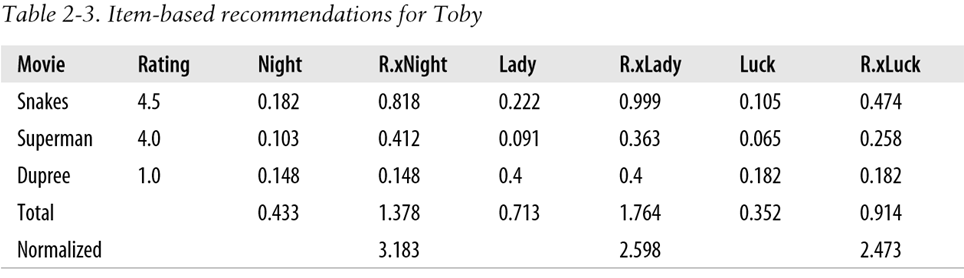

In [22]:
Image(filename='./images/04.png', width=500) 

In [23]:
def getRecommendedItems(prefs,itemMatch,user):
  userRatings=prefs[user] # 유저가 지금껏 본 {영화 : 평점} dic
  scores={}
  totalSim={}
  # Loop over items rated by this user
  for (item,rating) in userRatings.items( ): # key-value 즉 영화 : 평점

    # Loop over items similar to this one
    for (similarity,item2) in itemMatch[item]: # 미리 계산해둔 ItemSim => 영화 : [(유사도,영화)]

      # Ignore if this user has already rated this item
      if item2 in userRatings: continue  # 만약 내가 본 영화이면 pass
      # Weighted sum of rating times similarity
      scores.setdefault(item2,0)
      scores[item2]+=similarity*rating
      # Sum of all the similarities
      totalSim.setdefault(item2,0)
      totalSim[item2]+=similarity

  # Divide each total score by total weighting to get an average
  rankings=[(score/totalSim[item],item) for item,score in scores.items( )]

  # Return the rankings from highest to lowest
  rankings.sort( )
  rankings.reverse( )
  return rankings


In [24]:
getRecommendedItems(critics,itemsim,'Toby')

[(3.182634730538922, 'The Night Listener'),
 (2.5983318700614575, 'Just My Luck'),
 (2.4730878186968837, 'Lady in the Water')]

User-based와 비교했을 때 역시나 The Night Listener가 1등이다. 비록 2위와 3위가 바뀌긴 했지만 여전히 같이 있다. 중요한 것은 getRecommededItems 함수는 각 평점 간의 유사도 점수를 계산하지 않고 미리 계산된 유사도 데이터셋을 사용한다!

In [33]:
import codecs    

In [37]:
def loadMovieLens(path='ml-100k'):
  # Get movie titles
  movies={}
  for line in open(path+'/u.item', 'r', encoding='latin-1'):
    (id,title)=line.split('|')[0:2]
    movies[id]=title
  
  # Load data
  prefs={}
  for line in open(path+'/u.data'):
    (user,movieid,rating,ts)=line.split('\t')
    prefs.setdefault(user,{})
    prefs[user][movies[movieid]]=float(rating)
  return prefs

In [35]:
import pandas as pd

In [18]:
# 유저 정보 불러오기
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

In [20]:
# 레이팅 정보 불러오기
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

In [23]:
# 아이템 파일 불러오기
i_cols = ['movie id', 'movie title', 'release date', 'video release data',
         'IMDbURL', 'unknown', 'Action', 'Adventure', 'Animation', 'Chiledren\'s',
         'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
         'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
          'War', 'Western']
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')

In [24]:
print (users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [25]:
print (ratings.shape)
ratings.head()

(100000, 4)


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [26]:
print (items.shape)
items.head()

(1682, 24)


,movie id,movie title,release date,video release data,IMDbURL,unknown,Action,Adventure,Animation,Chiledren's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_base = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_base.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [28]:
ratings_base.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [38]:
prefs = loadMovieLens()

In [40]:
prefs['87']

{'2001: A Space Odyssey (1968)': 5.0,
 'Ace Ventura: Pet Detective (1994)': 4.0,
 'Addams Family Values (1993)': 2.0,
 'Addicted to Love (1997)': 4.0,
 'Adventures of Priscilla, Queen of the Desert, The (1994)': 3.0,
 'Adventures of Robin Hood, The (1938)': 5.0,
 'Air Force One (1997)': 3.0,
 'Air Up There, The (1994)': 3.0,
 'Alien (1979)': 4.0,
 'American President, The (1995)': 5.0,
 'Annie Hall (1977)': 4.0,
 'Apocalypse Now (1979)': 4.0,
 'Babe (1995)': 5.0,
 'Baby-Sitters Club, The (1995)': 2.0,
 'Back to the Future (1985)': 5.0,
 'Bad Boys (1995)': 4.0,
 'Bananas (1971)': 5.0,
 'Barcelona (1994)': 3.0,
 'Batman & Robin (1997)': 4.0,
 'Batman (1989)': 3.0,
 'Batman Returns (1992)': 3.0,
 'Big Green, The (1995)': 3.0,
 'Big Squeeze, The (1996)': 2.0,
 'Birdcage, The (1996)': 4.0,
 'Blade Runner (1982)': 4.0,
 'Blues Brothers, The (1980)': 5.0,
 'Boomerang (1992)': 3.0,
 'Boot, Das (1981)': 4.0,
 'Brady Bunch Movie, The (1995)': 2.0,
 'Braveheart (1995)': 4.0,
 'Bridge on the River

In [42]:
getRecommendations(prefs, '87')[0:10]

[(5.0, 'They Made Me a Criminal (1939)'),
 (5.0, 'Star Kid (1997)'),
 (5.0, 'Santa with Muscles (1996)'),
 (5.0, 'Saint of Fort Washington, The (1993)'),
 (5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 (5.0, 'Great Day in Harlem, A (1994)'),
 (5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 (5.0, 'Boys, Les (1997)'),
 (4.89884443128923, 'Legal Deceit (1997)'),
 (4.815019082242709, 'Letter From Death Row, A (1998)')]

In [44]:
lensSim = calculateSimilarItems(prefs, n=50)
getRecommendedItems(prefs, lensSim, '87')[0:10]

100 / 1664
200 / 1664
300 / 1664
400 / 1664
500 / 1664
600 / 1664
700 / 1664
800 / 1664
900 / 1664
1000 / 1664
1100 / 1664
1200 / 1664
1300 / 1664
1400 / 1664
1500 / 1664
1600 / 1664


[(5.0, "What's Eating Gilbert Grape (1993)"),
 (5.0, 'Vertigo (1958)'),
 (5.0, 'Usual Suspects, The (1995)'),
 (5.0, 'Toy Story (1995)'),
 (5.0, 'Titanic (1997)'),
 (5.0, 'Sword in the Stone, The (1963)'),
 (5.0, 'Stand by Me (1986)'),
 (5.0, 'Sling Blade (1996)'),
 (5.0, 'Silence of the Lambs, The (1991)'),
 (5.0, 'Shining, The (1980)')]

비록 item similarity dictionary 계산이 좀 걸리긴 하지만, 그 후 추천은 거의 즉각적으로 이루어진다! 게다가 유저가 증가함에 따라 더 걸리는 일도 없다.

# User-Based or Item-Based Filtering? 

데이터셋이 아주 클 때, Item-Based filtering은 User-Based보다 훨씬 빠르다. 하지만 아이템 유사도 매트릭스를 유지하는 것에 추가적인 오버헤드가 생길 수도 있다.  

물론 얼마나 "Sparse"한 데이터셋인가에 따라 정확도 차이도 많이 난다. 영화예제의 경우, 사람들이 거의 모든 영화에 대해 평점을 매겨놨기 때문에 매우 "dense(not sparse)" 하다. 

sparse-datasets의 경우, Item-Based filtering은 종종 User-based filtering보다 성능이 좋지만 dense한 경우에는 둘 다 비슷한 성능을 낸다. 

User-based filtering은 실행하기에 더욱 간단하지만 더 나아가진 못한다. 따라서 변화가 잦은 적은 데이터셋에 적절하다. 